[Accueil](../../../index.ipynb) > [Sommaire de Terminale](../../index.ipynb)

# Protocoles de routage

Ce chapitre est la continuité de la **découverte du réseau internet** découvert en SNT et poursuivi par les [**protocoles TCP/IP étudiés en première NSI**](../../../Premiere/6_Architecture/6_2_Reseau/index.ipynb
).

La partie pratique des protocoles de routage sera faite dans ce [TP](tp_rip.ipynb).

## Quelques rappels

### Le matériel du réseau

Un réseau informatique est constitué de différents types de matériel :

1. Les **hôtes** du réseau (PCs, portables, imprimante réseau, objet connectés...);
2. Les **commutateurs** réseau (switch en anglais) qui permettent de relier entre eux les différents hôtes d'un même réseau;
3. les **routeurs** qui permettent de relier plusieurs sous-réseaux.

Ces matériels sont reliés par différents types de liaisons **filaires** ou **hertziennes**:
- câbles ethernet
- fibre optique
- wifi
- 3G/4G/5G
- satellite
...

| une caméra wifi           | un commutateur (switch) | un routeur cisco 907                      | un câble ethernet    | fibres optiques    | 
| --------------------------| ----------------------- | ----------------------------------------- |--------------------- |------------------- |
| ![](img/wifi_camera.jpg)  | ![](img/switch.jpg)     | ![un routeur cisco 907](img/cisco907.jpg) | ![](img/ethernet.jpg)| ![](img/fibre.jpg) |


### Adressage IP

Tout objet IP possède un adresse IP qui contient:
- l'**adresse du réseau local** (extraite de l'IP par le **masque de réseau**)
- un **numéro d'adresse** unique dans le réseau.

**Exemples**:

- Une adresse IP définie par 192.168.5.17/24 appartient au réseau 192.168.5.0 et son numéro au sein de ce réseau est 17.
- Une adresse IP définie par 192.168.1.45/16 appartient au réseau 192.168.0.0 et son numéro au sein de ce réseau est 1.45.
- Une adresse IP définie par 10.11.12.13/8 appartient au réseau 10.0.0.0 et son numéro au sein de ce réseau est 11.12.13.

### Exemples de communications entre hôtes

![](img/reseau1.png)

- PC1 veut communiquer avec PC2

PC1 et PC2 appartiennent au réseau 192.168.0.0, les paquets passeront donc uniquement par le switch1. On aura donc **PC1 -> Switch1 -> PC2**

- PC3 veut communiquer avec PC4

PC3 et PC4 appartiennent au réseau 10.0.0.0, les paquets passeront donc uniquement par le switch2. On aura donc **PC3 -> Switch2 -> PC4**

- PC1 veut communiquer avec PC3

PC1 et PC3 appartiennent à des réseaux différents, les paquets passeront donc par des routeurs.

Plusieurs chemins sont possibles:

- PC1 -> R1 -> R6 -> PC3
- PC1 -> R1 -> R2 -> R3 -> R6 -> PC3
- PC1 -> R1 -> R4 -> R3 -> R6 -> PC3
- ...

Mais quel chemin sera emprunté ?
Comment un routeur connaît le prochain chemin à suivre ?

Nous allons tout d'abord répondre à la deuxième question.

## Notions de routage.

Le routage consiste à transmettre les données d'un réseau à un autre en prenant le 'bon' chemin.

Un paquet de données qui doit joindre un destinataire possède **uniquement l'adresse IP de destination**, et n'a donc aucune information pour déterminer le chemin à suivre.

Les routeurs et les hôtes gèrent une **table de routage**. La table de routage dresse :

- la liste des adresses IP des réseaux connus du système (notamment le réseau local);
- la passerelle à utiliser pour atteindre ce réseau;
- une métrique (le coût nécessaire pour atteindre la destination);
- l'interface réseau utilisée.

**La détermination du chemin à emprunter est à la charge des routeurs du système.**

**Exemple** :

Considérons le réseau suivant:

![](img/reseau2.png)

Ce réseau est constitué de :

- 3 hôtes
- 1 commutateur
- 6 routeurs (le routeur R6 est éteint)
- 8 sous-réseaux

Voici par exemple la table de routage du **routeur R1** dans le réseau suivant:

```
     1.0.0.0/24 is subnetted, 1 subnets
C       1.1.1.0 is directly connected, GigabitEthernet2/0
R    2.0.0.0/8 [120/1] via 1.1.1.2, 00:00:11, GigabitEthernet2/0
R    3.0.0.0/8 [120/2] via 1.1.1.2, 00:00:11, GigabitEthernet2/0
R    4.0.0.0/8 [120/3] via 1.1.1.2, 00:00:11, GigabitEthernet2/0
R    20.0.0.0/8 [120/4] via 1.1.1.2, 00:00:11, GigabitEthernet2/0
R    5.0.0.0/8 [120/4] via 1.1.1.2, 00:00:11, GigabitEthernet2/0
     6.0.0.0/24 is subnetted, 1 subnets
C       6.1.1.0 is directly connected, FastEthernet0/0
     10.0.0.0/24 is subnetted, 1 subnets
C       10.1.1.0 is directly connected, GigabitEthernet1/0
```
On peut réprésenter la table de routage du routeur R1 sous forme d'un tableau afin de mieux appréhender la signification de chaque ligne.

| réseau à atteindre     | masque de réseau       | passerelle             | metrique                | interface               |
| ---------------------- | ---------------------- | ---------------------- | ----------------------- | ----------------------- |
| 1.1.1.0                | 255.255.255.0          |                        | 0                       | GigabitEthernet 2/0     |
| 2.0.0.0                | 255.0.0.0              | 1.1.1.2                | 1                       | GigabitEthernet 2/0     |
| 3.0.0.0                | 255.0.0.0              | 1.1.1.2                | 2                       | GigabitEthernet 2/0     |
| 4.0.0.0                | 255.0.0.0              | 1.1.1.2                | 3                       | GigabitEthernet 2/0     |
| 5.0.0.0                | 255.0.0.0              | 1.1.1.2                | 4                       | GigabitEthernet 2/0     |
| 20.0.0.0               | 255.0.0.0              | 1.1.1.2                | 4                       | GigabitEthernet 2/0     |
| 6.0.0.0                | 255.255.255.0          |                        | 0                       | FastEthernet0/0         |
| 10.0.0.0               | 255.255.255.0          |                        | 0                       | GigabitEthernet1/0      |


### Les types de routage

On distingue deux types de routage.

1. Le routage statique (ou fixe)
2. Le routage dynamique (ou adaptatif)

Le **routage statique** consiste à écrire 'manuellement' les tables de routage d'un réseau. Comme son nom l'indique, ce type de routage n'évolue pas : les routes sont fixes et tout changement doit être configuré par une intervention humaine. Limité aux petits réseaux qui évoluent peu, son  optimisation est effectuée par le concepteur du réseau. Il possède comme avantage de ne pas générer de traffic superflu pour la mise à jour des table et peut également être utilisé en **complément d'un routage dynamique** en cas de panne de ce dernier.

Le **routage dynamique** quant à lui nécessite une mise à jour réguliere des tables de routage en fonction d'un **changement de topologie ou de charge** du réseau. Ces évolutions sont établies par des **algorithmes de routage**.

Il existe plusieurs algorithmes de routage [voir lien wikipedia](https://fr.wikipedia.org/wiki/Interior_gateway_protocol).

- RIPv1 (obsolète)
- RIPv2
- IGRP (protocole propriétaire Cisco - obsolète)
- EIGRP (protocole propriétaire Cisco)
- IS-IS
- OSPF

Les rôles de tous ces algorithmes sont: 

- d'établir la route optimale entre un point du réseau et toutes les destinations possibles;
- d'éviter les boucles dans le réseau
- de s'adapter le plus rapidement possible à un changement de topologie du réseau.

Parmis tous ces algorithmes nous allons étudier le **protocole RIPv2** et le **protocole OSPF**.


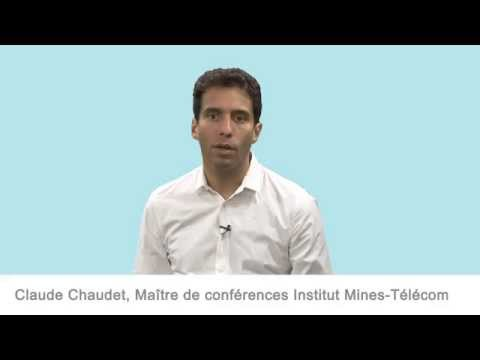

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("sT9-IcbjqzI")

## Le protocole RIP (version 2)

Le protocole RIP (**R**outing **I**nformation **P**rotocol) appartient à la famille des protocoles de routage à **vecteur de distance** (*distance vector*). Dans ce type de protocole, les tables de routages sont établies sans connaitre le réseau dans sa globalité. La diffusion des routes se fait de noeud en noeud.


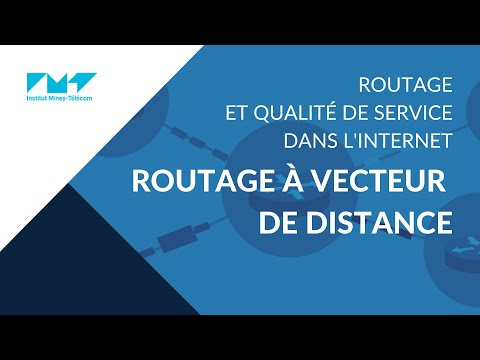

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("kzablGaqUXM")

### Un peu d'histoire

L'algorithme de routage RIP, l'algorithme de Bellman-Ford ([voir lien wikipedia](https://fr.wikipedia.org/wiki/Algorithme_de_Bellman-Ford)), a été déployé pour la première fois dans un réseau en 1969. C'était l'algorithme de routage d'ARPANET.

Une version qui utilise le protocole IP a été implémentée sur le système BSD comme le démon de routage. Puis d'autres implémentations différentes ont été créées. La norme [RFC 1058](https://www.rfc-editor.org/info/rfc1058) a été créée en 1988 pour unifier le protocole dans un standard unique.

### Fonctionnement général

Reprenons notre exemple précédent:

![](img/reseau2.png)

Comment l'hôte PC1 peut communiquer avec l'hôte PC3?

Au tout début le routeur R5 connait uniquement les réseaux auxquels il est directement connecté : 20.1.1.0, 5.1.1.0 et 4.1.1.0

- Il envoie ces informations aux routeurs voisins, dont R4, qui va mettre à jour sa table de routage en ajoutant 1 à la distance. Pour R4, le réseau 20.1.1.0 possède donc une métrique de 1
- R4 envoie des informations à R3 qui aura donc connaissance de ce réseau avec un métrique de 2
- R3 envoie des informations à R2 qui aura donc connaissance de ce réseau avec un métrique de 3
- R2 envoie des informations à R1 qui aura donc connaissance de ce réseau avec un métrique de 4

Le réseau 20.1.1.0 existe dorénavant dans la table de routage de R1, il possède une métrique de 4 pour le routeur R1.

La table de routage de R1 peut se résumer à ce tableau.

| destination | passerelle | interface| métrique |
| ----------- | ---------- | -------- | -------- |
| 10.1.1.0    |            | g1/0     | 0        |
| 1.1.1.0     |            | g2/0     | 0        |
| 6.1.1.0     |            | f0/0     | 0        |
| 2.1.1.0     | 1.1.1.0    | g2/0     | 1        |
| 3.1.1.0     | 1.1.1.0    | g2/0     | 2        |
| 4.1.1.0     | 1.1.1.0    | g2/0     | 3        |
| 20.1.1.0    | 1.1.1.0    | g2/0     | 4        |
| 5.1.1.0     | 1.1.1.0    | g2/0     | 4        |

### Algorithme utilisé

Le protocole RIP utilise l'algorithme de **Bellman-Ford** qui calcule les plus courts chemins dans un graphe depuis un sommet. Contrairement à l'agorithme de Dijkstra, celui-ci est **facilement mis en oeuvre dans un environnement distribué** : le plus court chemin peut être déterminé en utilisant des informations locales.

Voici le fonctionnement :

Lorsqu’un routeur reçoit une route d'un des routeurs voisins, il la compare les informations de sa propre table de routage :

- Si la destination n’existe pas, et que la métrique n’est pas infinie alors la route est ajoutée.
- Si la destination reçue existe, et que la métrique obtenue est meilleure alors la table de routage est mise à jour.
- Si la destination reçue existe, et que le routeur qui a envoyé la table est le routeur adjacent déjà connu, et que la métrique obtenue est différente, alors on met à jour la table de routage quelle que soit la valeur de la métrique.
- Sinon on ne change rien.

### Quelques caractéristiques du protocole RIP

- chaque routeur envoie sa table de routage aux routeurs voisins, toutes les 30s en multicast 224.0.0.9;
- la métrique la plus élevé possible est 15. RIP est donc utilisable uniquement dans les réseaux de diamètre 15;
- Si un routeur ne reçoit aucune information d'une route dans les 180s alors la métrique passe à 16 (inatteignable);
- Si un routeur ne reçoit aucune information d'une route dans les 240s alors la route est supprimée de la table de routage;
- Le protocole RIP utilise le protocole de communication UDP.

![](img/screenshotRIP.png)


<div class="alert alert-info">
Le protocole RIP se base sur le nombre de sauts (hops) à effectuer. Il choisit donc le chemin le plus court mais pas forcément le plus rapide.
En effet la bande passante disponible est totalement inconnue dans ce protocole.
</div>

### Avantages du protocole RIP
- Facile à comprendre et configurer
- Supporté par tous les routeurs

### Inconvénients du protocole RIP

- Sa seule métrique est le nombre de sauts (hops);
- Le nombre maximum de sauts est 15;
- Sa convergence est plûtot lente;
- Consomme de la bande passante par ses actualisations toutes les 30s.

### Travaux pratiques

Nous allons maintenant modéliser un réseau qui utilise le protocole RIP dans ce [TP RIP](./tp_rip.ipynb).

### Liens externes

- [une fiche récapitulative sur le protocole RIP](https://www.ciscomadesimple.be/wp-content/uploads/2011/04/CMSBE_F03_RIP.pdf)
- [une viéo sur le protocole RIP](https://youtu.be/eRl0an-a3m0)

## Le protocole OSPF

![](img/OSPF.png)

le protocole OSFP (**O**pen **S**hortest **P**ath **F**irst) appartient à la famille des protocoles de routage à **état de liens**.

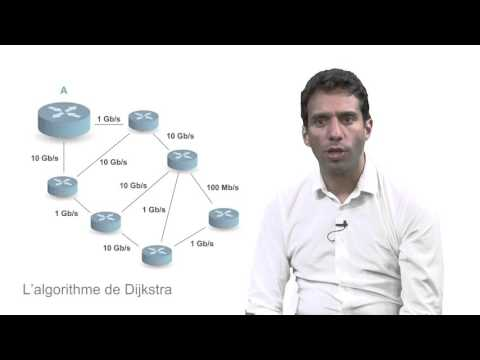

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("-utHPKREZV8")

Dans cette famille, chaque routeur connait **la topologie complète du réseau**. Chaque routeur envoie à **tous** les routeurs du réseau les caractéristiques de son voisinage direct (adresses IP, caractéristiques physiques). Ces messages sont souvent appelés **messages hello**.

![](img/hello.png)

<div class="alert alert-warning">
Contrairement à RIP, OSPF n'échange des informations de routage que lorsqu'il y a un <b>changement</b> dans la topologie du réseau.
</div>

Les messages échangés ne concernent pas le nombre de sauts à effectuer vers une route mais plutôt le **coût des liaisons** vers les routeurs adjacents.

Le protocole utilise l'algorithme de Dijktra ([voir cours](../../6_Algorithmique/6.2_Algorithmes_sur_les_graphes/index.ipynb#algo_dijkstra)) pour calculer 'le plus court chemin'.

Bien evidemment dans un réseau informatique le plus court chemin n'a rien à voir avec la distance !!!

Ici l'algorithme va déterminer, à partir d'un routeur du réseau, l'ensemble des routes ayant un **coût le plus faible**. La notion de coût est liée **au débit des liaisons**, plus précisement le coût est proportionnel à l'inverse du débit. 

$coût = \frac{10^8}{débit}$

- Pour un débit de 10 Mbits/s on a $coût = \frac{10^8}{10^7}=10$
- Pour un débit de 100 Mbits/s on a $coût = \frac{10^8}{10^8}=1$
- Pour un débit de 1 GBbits/s on a $coût = \frac{10^8}{10^9}=10^{-1}=0.1$

L'algorithme prilégiera les liaisons à coût les plus faibles c'est à dire les **liaisons à forte bande passante**.

<div class="alert alert-warning">Attention cette formule peut varier. Ici elle est définie pour avoir un <b>coût unitaire pour 100 Mbits/s</b>, la constante $10^8$ peut être différente.</div>

### Exercice

Dans le réseau ci-dessous, calculer les coûts des deux routes depuis le routeur 1, vers le routeur 5.

![](img/reseau2.png)

On prendra comme constante $10^9$ et on considère les débits suivants:

- Pour une liaison fast-ethernet (f) : 100 Mbits/s
- Pour une liaison gigabits-ethernet (g) : 1 Gbits/s

**A faire**

- Etablir les coûts de chaque liaison
- Quelle route sera privilégiée par le protocole OSPF ?
- Etablir la table de routage du routeur 1.

### Quelques caractéristiques du protocole OSPF

- Les messages Hello sont envoyés en multicast sur 224.0.0.5;
- Chaque routeur est identifié dans le reseau à l'aide d'un *router-id*;
- Les routeurs sont segmentés en aires différentes;
- Il existe 5 types de paquets OSPF;
- OSPF est capable de répartir la charge sur plusieurs liens, pour autant que la métrique soit exactement identique pour chaque destination.

### Avantages du protocole OSPF

- C'est un standard ouvert, il est donc implémenté par de nombreux fabricants;
- Temps de convergence court:
- Il est économe en bande passante.

### Inconvénients du protocole OSPF

- Nécessite beaucoup de mémoire pour stocker la topologie complète du réseau;
- Se limite à des topologies d'environ 1000 routeurs;
- Sa configuration est complexe
- Il ne permet pas de répartir la charge sur des routes de métriques différentes.

Pour les plus curieux, la configuration de routeurs OSPF.

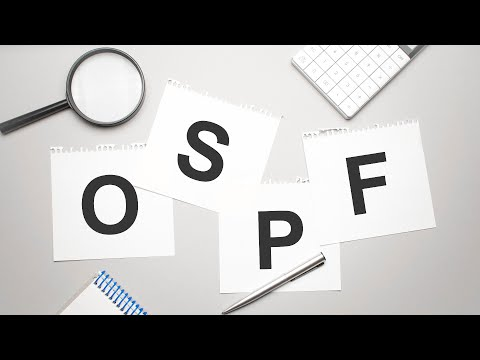

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("6FeNi1djwc8")

Pour les plus courageux, un [lien vers la simulation d'un réseau OSPF sur GNS3](https://www.ciscomadesimple.be/2010/11/14/gns3-ospf-lab-1ere-partie/). Attention il y a 4 parties...

## Sources

- https://interstices.info/internet-le-conglomerat-des-reseaux/
- http://www.nicolasjean.com/pdf/essai_routage.pdf
- https://pixees.fr/informatiquelycee/term/c11c.html
- http://nsi4noobs.fr/IMG/pdf/c3_tnsi_routage.pdf
- https://nc-lycees.netocentre.fr/s/TdgPXGwAEDnpSsg
- http://stjonum.fr/T/architecture/a2.html
- http://idum.fr/spip.php?article213#chap14
